In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


2025-11-07 13:34:36.235714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762551276.255716  831025 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762551276.261764  831025 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762551276.277636  831025 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762551276.277653  831025 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762551276.277654  831025 computation_placer.cc:177] computation placer alr

## Image Overlay

In [2]:
## quick POC to try how image overlays would work. 
pixels = np.ones(shape=(10,10,1))
canvas = np.zeros(shape=(100,100,1))
temp = np.zeros(shape=(28,28))

In [3]:
## lets see if we can render canvas as image
## helper function to plot the mnist data instances
def plot_canvas(canvas_data):
    plt.imshow(canvas_data)  # Use 'gray' colormap to render grayscale
    plt.axis("off") # Remove axes for better visualization    
    plt.show()

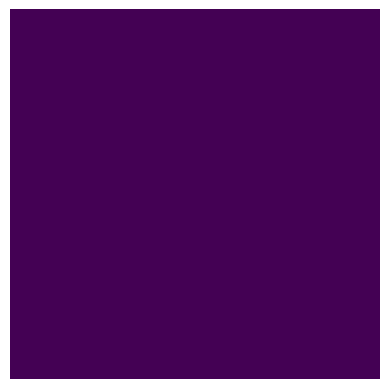

In [4]:
## lets say we want to put the pixels on top, left corner of canvas so 
plot_canvas(canvas)

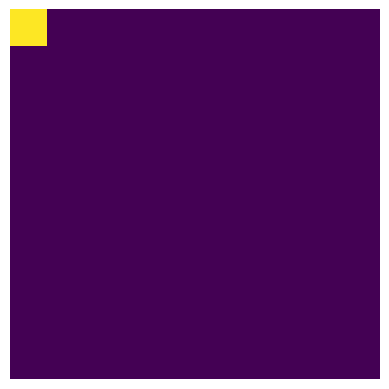

In [5]:
## lets overlay the pixels which should be a white blob on top left corner of canvas
canvas[0:10,0:10] = pixels
plot_canvas(canvas)

In [6]:
temp1 = [1,2,3,4]
[a,b,c,d] = temp1
a

1

In [7]:
import numpy as np
np.random.randint(0, high=100)

80

In [8]:
import os 
dir_path = os.getcwd()
dir_path


'/home/gaurangdave/workspace/mnist_object_detection/notebooks'

In [9]:
import tensorflow as tf

# The "warehouse" of scores
params = tf.constant([[10, 20, 30, 40],
                      [50, 60, 70, 80],
                      [90, 11, 22, 33],
                      [44, 55, 66, 77]])

# The list of "GPS coordinates"
indices = tf.constant([[0, 1],   # Get the score at (row=0, col=1)
                       [3, 2],   # Get the score at (row=3, col=2)
                       [1, 0]])  # Get the score at (row=1, col=0)


tf.gather_nd(params=params, indices=indices)

I0000 00:00:1762551280.150546  831025 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5903 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:2e:00.0, compute capability: 7.5


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([20, 66, 50], dtype=int32)>

In [10]:
import tensorflow as tf

# The same "warehouse" of scores
params = tf.constant([[10, 20, 30, 40],
                      [50, 60, 70, 80],
                      [90, 11, 22, 33],
                      [44, 55, 66, 77]])

# The list of row indices you want to select
indices = tf.constant([[2],   # Get the entire row at index 2
                       [0]])  # Get the entire row at index 0

tf.gather_nd(params=params, indices=indices)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[90, 11, 22, 33],
       [10, 20, 30, 40]], dtype=int32)>

In [11]:
import tensorflow as tf

# A batch of 3 matrices, shape (3, 4, 4)
params = tf.constant([
  [[10, 20, 30, 40],   # Matrix 0
   [50, 60, 70, 80],
   [90, 11, 22, 33],
   [44, 55, 66, 77]],

  [[110, 120, 130, 140], # Matrix 1
   [150, 160, 170, 180],
   [190, 111, 122, 133],
   [144, 155, 166, 177]],

  [[210, 220, 230, 240], # Matrix 2
   [250, 260, 270, 280],
   [290, 211, 222, 233],
   [244, 255, 266, 277]]
])

# The list of row indices to gather.
# We want to get row 2 from Matrix 0, row 0 from Matrix 1, and row 3 from Matrix 2.
indices = tf.constant([[2],   # Row index for Matrix 0
                       [0],   # Row index for Matrix 1
                       [3]])  # Row index for Matrix 2


tf.gather_nd(params=params, indices=indices, batch_dims=1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 90,  11,  22,  33],
       [110, 120, 130, 140],
       [244, 255, 266, 277]], dtype=int32)>

# TensorFlow Experiments

In [12]:
my_tensor = tf.constant([[0, 5, 0],
 [0, 8, 2],
 [0, 3, 0]])

In [13]:
my_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 5, 0],
       [0, 8, 2],
       [0, 3, 0]], dtype=int32)>

In [14]:
tf.reduce_sum(my_tensor, keepdims=True, axis=1)

<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[ 5],
       [10],
       [ 3]], dtype=int32)>

In [15]:
tf.reduce_sum(my_tensor, keepdims=True, axis=0)

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[ 0, 16,  2]], dtype=int32)>

## Generation 1,28 and 28,1 tensors 

In [16]:
active_row_indices = tf.random.uniform(shape=(5,1),minval=0,maxval=28, dtype=tf.int32)
row_zeros = tf.zeros(shape=(5,1), dtype=tf.int32)

active_row_indices = tf.concat(values = [active_row_indices,row_zeros], axis=1)
active_row_indices

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[ 4,  0],
       [19,  0],
       [ 1,  0],
       [ 9,  0],
       [22,  0]], dtype=int32)>

In [17]:
## create tensors

# A column tensor of shape (28, 1). Think of it as a vertical strip.
# Each element represents the "activity" of a single row.
active_rows = tf.zeros(shape=(28,1), dtype=tf.float32)

# A row tensor of shape (1, 28). Think of it as a horizontal strip.
# Each element represents the "activity" of a single column.
active_cols = tf.zeros(shape=(1,28), dtype=tf.float32)


## generate random indices to update

# To update 5 specific rows in `active_rows`, we need 5 indices.
# The shape is (5, 1) because `active_rows` is a 2D tensor, but since it only has
# one column, TensorFlow lets us use a simpler index with just one coordinate (the row number).
active_row_indices = tf.random.uniform(shape=(5,1), minval=0, maxval=28, dtype=tf.int32)


# To update 5 specific columns in `active_cols`, we still need 5 indices.
# We create a (5, 1) tensor of random column numbers first.
active_col_indices_random = tf.random.uniform(shape=(5,1), minval=0, maxval=28, dtype=tf.int32)
# We also need a (5, 1) tensor of row numbers. Since `active_cols` only has one row, this is always 0.
column_zeros = tf.zeros(shape=(5,1), dtype=tf.int32)
# We concatenate them to create the final indices.
# The shape is (5, 2) because we are providing 5 full (row, column) coordinates
# to precisely identify each element in the 2D `active_cols` tensor.
active_col_indices = tf.concat(values=[column_zeros, active_col_indices_random], axis=1)


## create update tensor

# --- INTUITION FOR `row_updates` ---
# We are updating 5 rows. Each `index` in `active_row_indices` points to a slice of
# `active_rows`. The shape of this slice is (1,).
# Therefore, our `updates` tensor must provide 5 "packages", where each package has a shape of (1,).
# The final shape is (num_updates, slice_shape_part_1) -> (5, 1).
row_updates = tf.ones(shape=(5,1), dtype=tf.float32)

# --- INTUITION FOR `col_updates` ---
# We are updating 5 columns. Each `(row, col)` coordinate in `active_col_indices` points
# to a single SCALAR element within `active_cols`. The shape of this slice is ().
# Therefore, our `updates` tensor must provide 5 "packages", where each package is a scalar.
# A list of 5 scalars is a 1D tensor of shape [5].
col_updates = tf.ones(shape=[5], dtype=tf.float32)


# Perform the updates
updated_active_rows = tf.tensor_scatter_nd_update(active_rows, active_row_indices, updates=row_updates)
updated_active_cols = tf.tensor_scatter_nd_update(active_cols, active_col_indices, updates=col_updates)

In [18]:
@tf.function
def get_min_max(active_rows, active_cols):
    # find x_min, x_max
    # step 1 find indices for active x
    non_zero_active_cols = tf.where(active_cols != 0)
    # get the first and last active x as x_min and x_max
    x_min = tf.cast(tf.reduce_min(non_zero_active_cols[:, 1]), dtype=tf.int32)
    x_max = tf.cast(tf.reduce_max(non_zero_active_cols[:, 1]), dtype=tf.int32)

    ##
    non_zero_active_rows = tf.where(active_rows != 0)
    y_min = tf.cast(tf.reduce_min(non_zero_active_rows[:, 0]), dtype=tf.int32)
    y_max = tf.cast(tf.reduce_max(non_zero_active_rows[:, 0]), dtype=tf.int32)

    return x_min, x_max, y_min, y_max


x_min, x_max, y_min, y_max = get_min_max(
    updated_active_rows, updated_active_cols)
x_min, x_max, y_min, y_max

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=26>,
 <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=17>)

In [19]:
temp = tf.where(updated_active_cols != 0)
tf.reduce_min(temp[:,1]),tf.reduce_max(temp[:,1])


(<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=26>)

In [20]:
temp = tf.where(updated_active_rows != 0)
tf.reduce_min(temp[:,0]),tf.reduce_max(temp[:,0])


(<tf.Tensor: shape=(), dtype=int64, numpy=5>,
 <tf.Tensor: shape=(), dtype=int64, numpy=17>)

In [21]:
temp

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[ 5,  0],
       [12,  0],
       [15,  0],
       [17,  0]])>

In [22]:
# importing the library
import tensorflow as tf

# Initializing the input tensor
data = tf.constant([[0, 2],[0, 5], [1, 5], [2, 8]], dtype = tf.float32)
segment_ids = tf.constant([0, 0, 1,2])

# Printing the input tensor
print('data: ', data)
print('segment_ids: ', segment_ids)

# Calculating result
res = tf.math.segment_min(data, segment_ids)

# Printing the result
print('Result: ', res)

data:  tf.Tensor(
[[0. 2.]
 [0. 5.]
 [1. 5.]
 [2. 8.]], shape=(4, 2), dtype=float32)
segment_ids:  tf.Tensor([0 0 1 2], shape=(4,), dtype=int32)
Result:  tf.Tensor(
[[0. 2.]
 [1. 5.]
 [2. 8.]], shape=(3, 2), dtype=float32)


In [23]:
import tensorflow as tf

def process_element(x):
    # Create tensor with variable first dimension
    size = tf.cast(x * 3, tf.int32) + 1
    return tf.ones([size, 2]) * x

# Input tensor
inputs = tf.constant([1.0, 2.0, 3.0, 4.0])

# Map with ragged output
ragged_result = tf.map_fn(
    process_element,
    inputs,
    fn_output_signature=tf.RaggedTensorSpec(shape=[None, 2], dtype=tf.float32)
)

print(ragged_result)
# Result will be a RaggedTensor with shapes: (4, 2), (7, 2), (10, 2), (13, 2)

ValueError: Error in map_fn:
  Expected `fn` to return a:
    RaggedTensorSpec(TensorShape([None, 2]), tf.float32, 1, tf.int64)
  But it returned a:
    TensorSpec(shape=(4, 2), dtype=tf.float32, name=None)
    (value=tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(4, 2), dtype=float32))
  To fix, update the `fn_output_signature` (or `dtype`) argument to `map_fn`.

In [ ]:
pred = tf.zeros(shape=(3,15))    
pred = tf.expand_dims(pred, axis = 2)
pred

<tf.Tensor: shape=(3, 15, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [ ]:
batch_size = 3
combine_update_index = tf.range(batch_size)
combine_update_index = tf.reshape(
        combine_update_index, shape=(batch_size, 1, 1))

combine_update_index = tf.tile(
        combine_update_index, [1, 5, 1])    

combine_update_index


<tf.Tensor: shape=(3, 5, 1), dtype=int32, numpy=
array([[[0],
        [0],
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        [2],
        [2]]], dtype=int32)>

In [ ]:
grid_width = 5
grid_height = 3
gridx_coordinate_range = tf.range(grid_width, dtype=tf.float32) 
gridy_coordinate_range = tf.range(grid_height, dtype=tf.float32)
grid_y,grid_x = tf.meshgrid(gridy_coordinate_range,gridx_coordinate_range, indexing="ij")
image_grid = tf.stack(values=[grid_y,grid_x], axis=-1)
image_grid

<tf.Tensor: shape=(3, 5, 2), dtype=float32, numpy=
array([[[0., 0.],
        [0., 1.],
        [0., 2.],
        [0., 3.],
        [0., 4.]],

       [[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]],

       [[2., 0.],
        [2., 1.],
        [2., 2.],
        [2., 3.],
        [2., 4.]]], dtype=float32)>

In [27]:
grid_width = 5
grid_height = 3
grid_dims_tensor = tf.cast(tf.stack([(grid_width,grid_height)]),dtype=tf.float32)
grid_dims_tensor

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[5., 3.]], dtype=float32)>